In [1]:
#imported the libraries

import pandas as pd                    
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", color_codes=True)
import numpy as np
from scipy.stats import norm

In [2]:
#loading the data
df= pd.read_excel('amcat/data.xlsx')
print(df)

     Unnamed: 0      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01              present   
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1               assistant manager    

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [11]:
# To print the description of the data
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [8]:
df=df.drop("Unnamed: 0", axis=1)

In [9]:
# List of categorical columns to find unique values
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [10]:
# To convert into lower aplhabet for distribution

df["JobCity"].str.lower()

0              bangalore
1                 indore
2                chennai
3                gurgaon
4                manesar
              ...       
3993          new delhi 
3994           hyderabad
3995           bangalore
3996    asifabadbanglore
3997             chennai
Name: JobCity, Length: 3998, dtype: object

In [12]:
# To convert present value into present date for good distribution and the convert into datetime format
import datetime as dt
df["DOL"].replace("present",dt.datetime.today(),inplace=True)
df['DOL'] = pd.to_datetime(df['DOL']).dt.date
df['Period'] = pd.to_datetime(df["DOL"]).dt.year - pd.to_datetime(df['DOJ']).dt.year
df.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
0,203097,420000,2012-06-01,2024-10-04,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12
1,579905,500000,2013-09-01,2024-10-04,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11
2,810601,325000,2014-06-01,2024-10-04,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10
3,267447,1100000,2011-07-01,2024-10-04,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


In [13]:
# To get the data which has designation = get

df[df["Designation"]=="get"][['Designation','JobCity','Salary','Specialization']]

,Designation,JobCity,Salary,Specialization
4,get,Manesar,200000,electronics and communication engineering
332,get,-1,180000,mechanical and automation
350,get,Faridabad,340000,electrical engineering
1717,get,Hyderabad,145000,mechanical engineering
1897,get,Hyderabad,175000,mechanical engineering
2140,get,Indore,600000,mechanical engineering
2318,get,Lucknow,220000,electronics and electrical engineering
2443,get,kharagpur,110000,mechanical engineering
2666,get,Hyderabad,200000,electronics and electrical engineering
2757,get,Nashik,350000,mechanical engineering


In [14]:
# Count -1 values across all columns
df.isin([-1, 'NaN']).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [15]:
# To convert -1 values in the data into unknown
df['JobCity'].replace(-1,'unknown',inplace=True)
df['JobCity'].apply(lambda x:x.title())

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [16]:
df.isin([-1, 'NaN']).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [17]:
# To find the unknown in the data.

df[df["JobCity"]=='unknown']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
15,536517,350000,2013-08-01,2024-10-04,network engineer,unknown,f,1990-01-17,69.54,icse,...,-1,-1,-1,-1,1.7465,1.9048,0.6720,-0.29020,1.2528,11
21,339689,200000,2012-08-01,2013-12-01,software engineer,unknown,f,1991-08-20,75.67,up,...,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,1
39,533417,200000,2013-01-01,2013-06-01,management trainee,unknown,m,1991-02-28,88.00,kerala state technical education,...,-1,-1,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455,0
77,754392,120000,2014-07-01,2024-10-04,test engineer,unknown,m,1992-02-18,76.00,state board,...,-1,-1,-1,-1,-0.1590,-0.2871,0.4711,0.27270,-0.4776,10
79,1089852,100000,2013-08-01,2014-05-01,software developer,unknown,f,1992-05-17,86.00,state board,...,-1,-1,-1,-1,0.5591,-0.4536,0.0100,-0.48790,0.6721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,385546,205000,2012-10-01,2014-02-01,production engineer,unknown,m,1991-01-13,84.80,cbse,...,-1,-1,233,-1,0.1623,0.0328,-0.3440,-1.05410,0.5024,2
3942,1067015,280000,2013-07-01,2024-10-04,software engineer,unknown,m,1990-03-17,78.00,state board,...,-1,-1,-1,-1,1.7081,-0.9531,0.1637,-1.62890,-0.8608,11
3954,531726,310000,2014-04-01,2015-04-01,business intelligence analyst,unknown,f,1992-11-15,88.40,ssc,...,-1,-1,393,-1,0.8192,0.6568,0.9623,-0.29020,0.0679,1
3973,755067,335000,2013-08-01,2024-10-04,programmer analyst,unknown,m,1990-05-20,66.85,state board,...,-1,-1,-1,-1,0.2718,-0.1206,-1.2196,-0.36120,-0.6692,11


# DATA VISUALIZATION

Text(0, 0.5, 'count')

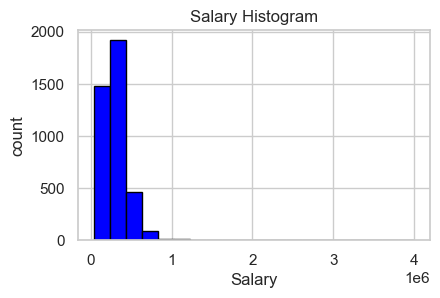

In [30]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 2)
plt.hist(df['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('count')

This plot depicts the salary distribution in our dataset, highlighting the frequency across different salary ranges and providing insights into the overall salary

Text(0.5, 1.0, 'Salary Boxplot')

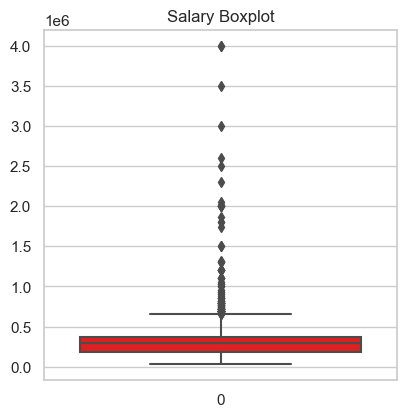

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(df['Salary'], color='Red')
plt.title('Salary Boxplot')


The boxplot illustrates the salary distribution, with the median centrally positioned and the interquartile range capturing the middle 50% of salaries. Any outliers indicate notable deviations in salary levels across the dataset.


m    3041
f     957
Name: Gender, dtype: int64


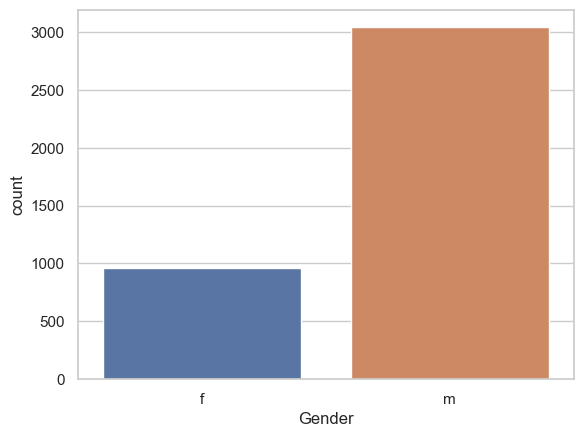

In [31]:
# Count plot of the Gender column

sns.countplot(x='Gender', data=df)
print(df['Gender'].value_counts())


The observation about countplot:The dataset contains significantly more male respondents (3041) compared to female respondents (957). The gender distribution is skewed, with approximately 76% of the entries being male and only 24% being female.

Text(0.5, 1.0, 'Degree Bar Plot')

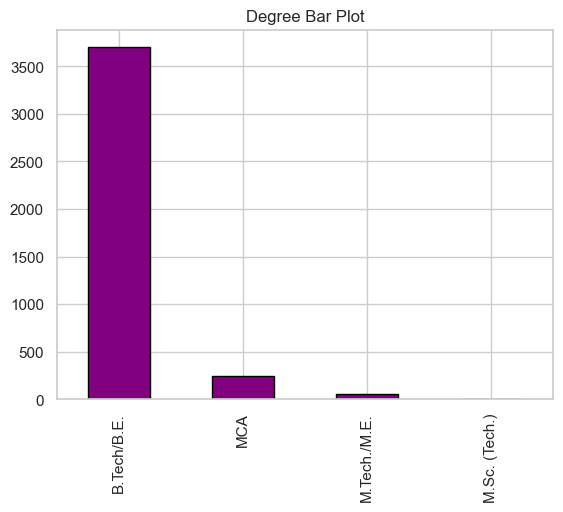

In [38]:
plt.subplot(1, 1, 1)
df['Degree'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Degree Bar Plot')

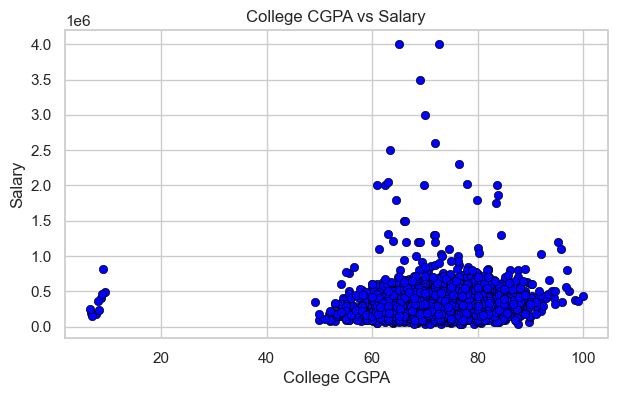

In [51]:
# Relationships between Numerical Columns

plt.figure(figsize=(7,4 ))
sns.scatterplot(x='collegeGPA', y='Salary', data=df, color='blue', edgecolor='black')
plt.title('College CGPA vs Salary')
plt.xlabel('College CGPA')
plt.ylabel('Salary')
plt.show()

<Figure size 100x100 with 0 Axes>

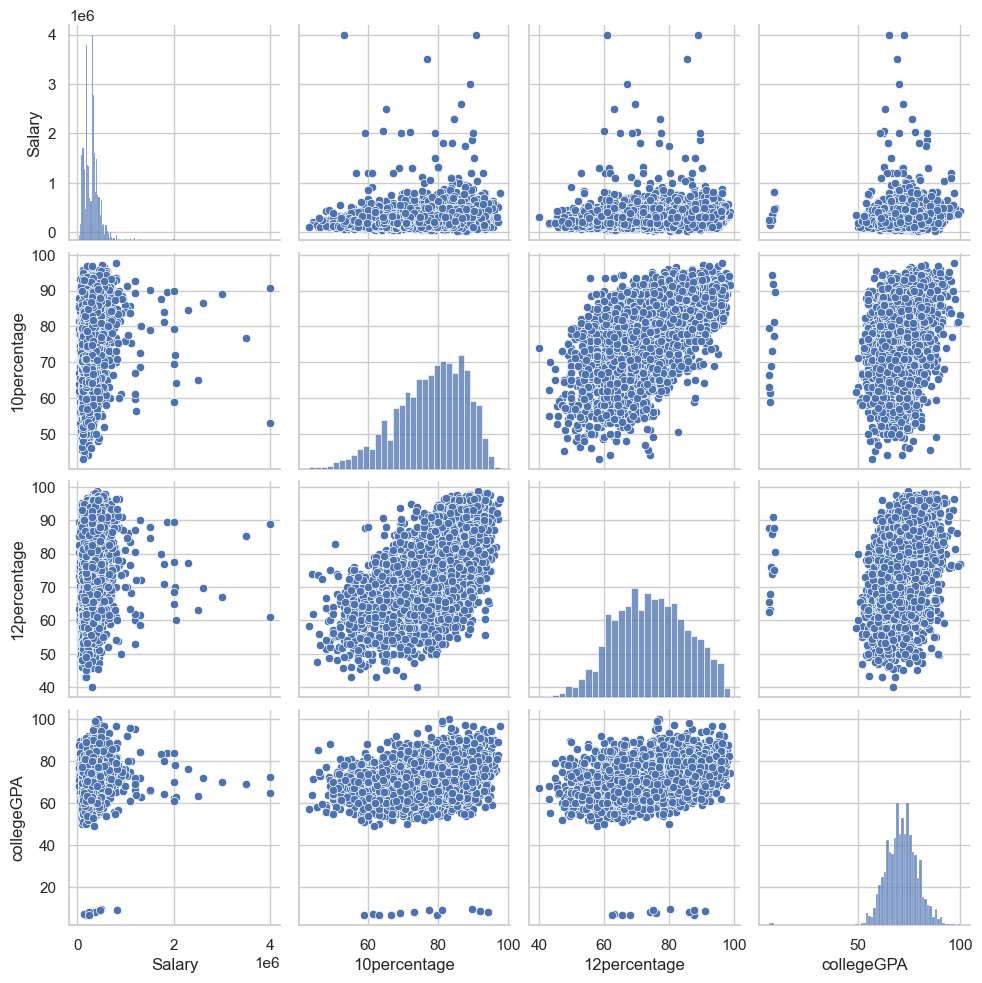

In [58]:
plt.figure(figsize=(1,1 ))
sns.pairplot(df[['Salary', '10percentage', '12percentage', 'collegeGPA']])
plt.show()

In [61]:
high = list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = df[df['Designation'].isin(high)]
high_pay.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
3,267447,1100000,2011-07-01,2024-10-04,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,13
6,947847,300000,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,state board,...,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1
14,1279958,300000,2013-07-01,2024-10-04,java software engineer,Bangalore,m,1992-07-02,81.20,state board,...,-1,-1,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,11
19,466888,325000,2014-09-01,2024-10-04,software engineer,Pune,f,1990-11-30,79.00,cbse,...,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295,10
20,140069,320000,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,...,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444,2


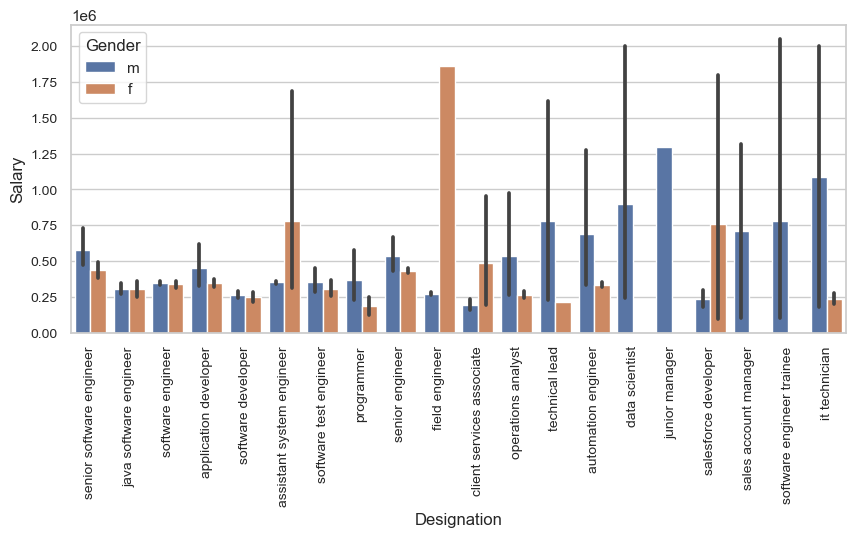

In [71]:
plt.figure(figsize=(10,4))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=high_pay)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

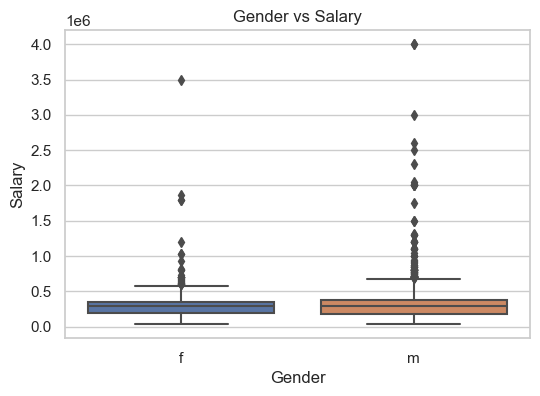

In [76]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()  

<Axes: >

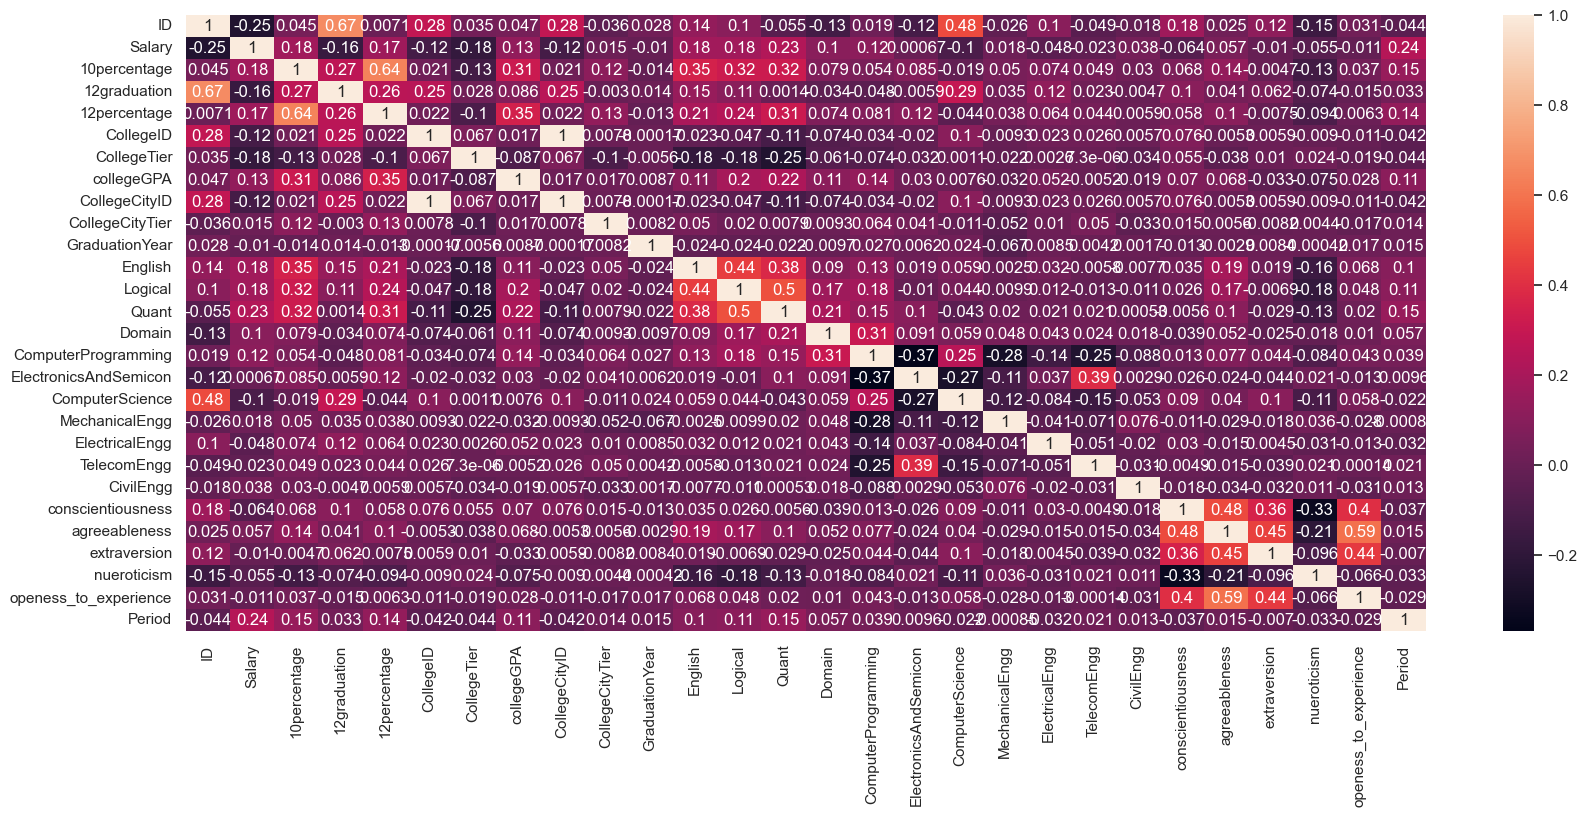

In [80]:
# Creating a heatmap to show the correlation matrix of numerical columns in the dataframe
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

In [83]:
specificjobs = ['senior quality engineer']
csescandidates = df[(df['Degree'] == 'B.Tech/B.E.') & (df['Specialization'] == 'computer engineering')]
filtereddf = csescandidates[csescandidates['Designation'].isin(specificjobs)]
avgsalaries = filtereddf['Salary'].mean()
print("Average Salary for CSE Freshers in Specific Role:-", avgsalaries, "LPA")

Average Salary for CSE Freshers in Specific Role:- 460000.0 LPA


he average salary of Computer Science and Engineering (CSE) graduates in designated roles, specifically focusing on the position of Senior Quality Engineer, and to understand how these salaries compare to overall trends within the engineering job market. This analysis aims to identify potential factors influencing salary variations among freshers in the technology sector.






